<a href="https://colab.research.google.com/github/abhijiths1998/Hotel-Customer-Segementation/blob/main/Hotel_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Hotel_Customer_Segmentation

### Problem Statement
* Our aim is to segment the incoming customer based on the features in dataset using clustering and predict the type of customer incoming using classification models

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style = 'whitegrid')
sns.set_palette('Set2')

In [51]:
df = pd.read_excel('HotelCustomersDataset.xlsx')

In [52]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


## Understanding and preparing data

In [53]:
df.set_index('ID',inplace=True)

In [54]:
# Dropping unusable features for further analysis
df = df.drop(columns=['Nationality','NameHash','DocIDHash'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83590 entries, 1 to 83590
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   79811 non-null  float64
 1   DaysSinceCreation     83590 non-null  int64  
 2   AverageLeadTime       83590 non-null  int64  
 3   LodgingRevenue        83590 non-null  float64
 4   OtherRevenue          83590 non-null  float64
 5   BookingsCanceled      83590 non-null  int64  
 6   BookingsNoShowed      83590 non-null  int64  
 7   BookingsCheckedIn     83590 non-null  int64  
 8   PersonsNights         83590 non-null  int64  
 9   RoomNights            83590 non-null  int64  
 10  DaysSinceLastStay     83590 non-null  int64  
 11  DaysSinceFirstStay    83590 non-null  int64  
 12  DistributionChannel   83590 non-null  object 
 13  MarketSegment         83590 non-null  object 
 14  SRHighFloor           83590 non-null  int64  
 15  SRLowFloor         

In [56]:
df.iloc[:,:15].head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor
ID,,,,,,,,,,,,,,,
1,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0
2,NaN,1095,61,280.0,53.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0
3,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0
4,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0
5,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0


In [57]:
df.iloc[:,16:].head()

,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0


In [58]:
df.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,2.358536,401.067137,403.349013,0.047482,0.001412,0.000251,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,2.281746,347.204955,347.971089,0.212668,0.037546,0.015848,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,26.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,2.000000,366.000000,369.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,4.000000,693.000000,697.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,185.000000,1104.000000,1186.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df.nunique()

Age                       105
DaysSinceCreation        1095
AverageLeadTime           418
LodgingRevenue          10257
OtherRevenue             4490
BookingsCanceled            6
BookingsNoShowed            4
BookingsCheckedIn          29
PersonsNights              56
RoomNights                 48
DaysSinceLastStay        1105
DaysSinceFirstStay       1108
DistributionChannel         4
MarketSegment               7
SRHighFloor                 2
SRLowFloor                  2
SRAccessibleRoom            2
SRMediumFloor               2
SRBathtub                   2
SRShower                    2
SRCrib                      2
SRKingSizeBed               2
SRTwinBed                   2
SRNearElevator              2
SRAwayFromElevator          2
SRNoAlcoholInMiniBar        2
SRQuietRoom                 2
dtype: int64

## Inference
* We can clearly see that from SRHighFloor onwards all the columns are catrgorical deemed as numerical

In [60]:
# Converting the above mentioned features to categorical variable for further analysis
df.iloc[:,14:] = df.iloc[:,14:].astype('object') 

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83590 entries, 1 to 83590
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   79811 non-null  float64
 1   DaysSinceCreation     83590 non-null  int64  
 2   AverageLeadTime       83590 non-null  int64  
 3   LodgingRevenue        83590 non-null  float64
 4   OtherRevenue          83590 non-null  float64
 5   BookingsCanceled      83590 non-null  int64  
 6   BookingsNoShowed      83590 non-null  int64  
 7   BookingsCheckedIn     83590 non-null  int64  
 8   PersonsNights         83590 non-null  int64  
 9   RoomNights            83590 non-null  int64  
 10  DaysSinceLastStay     83590 non-null  int64  
 11  DaysSinceFirstStay    83590 non-null  int64  
 12  DistributionChannel   83590 non-null  object 
 13  MarketSegment         83590 non-null  object 
 14  SRHighFloor           83590 non-null  object 
 15  SRLowFloor         

In [62]:
df.describe(include='object')

,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590,83590,83590,83590,83590,83590,83590,83590,83590,83590,83590,83590,83590,83590,83590
unique,4,7,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,68569,48039,79621,83472,83569,83517,83352,83447,82485,54109,71675,83562,83297,83580,76203


## Data Cleaning and EDA

In [63]:
# Finding null values and its treatment
df.isnull().sum()*100/len(df)

Age                     4.520876
DaysSinceCreation       0.000000
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DaysSinceLastStay       0.000000
DaysSinceFirstStay      0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoom             0.000000
dtype: float64

In [64]:
df = df.dropna()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


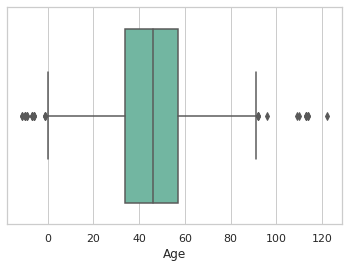

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


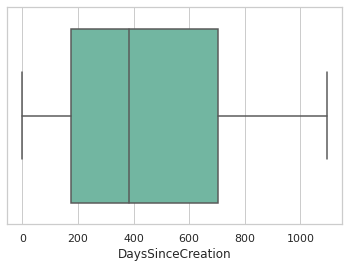

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


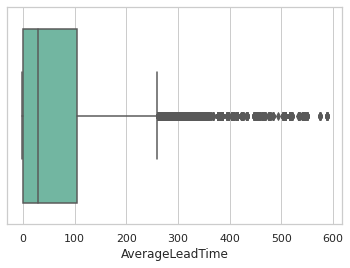

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


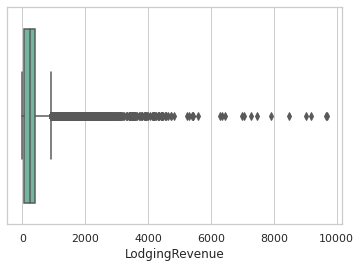

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


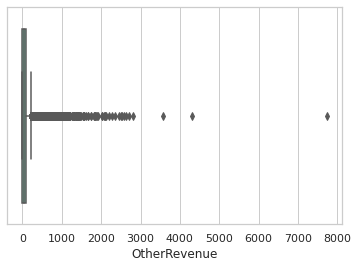

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


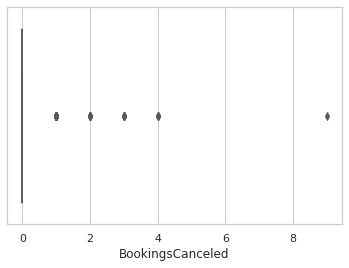

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


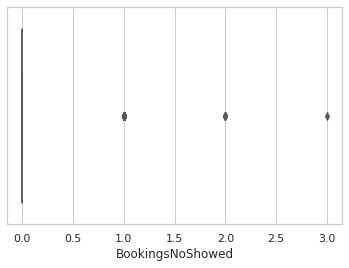

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


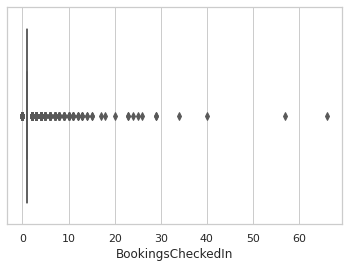

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


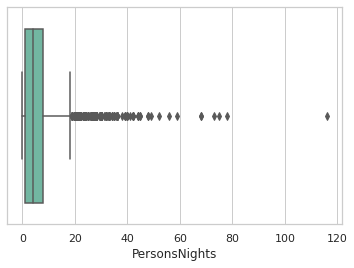

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


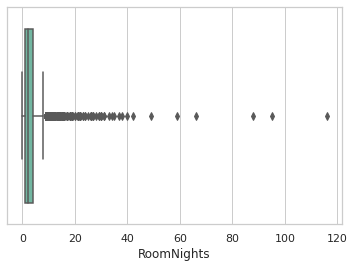

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


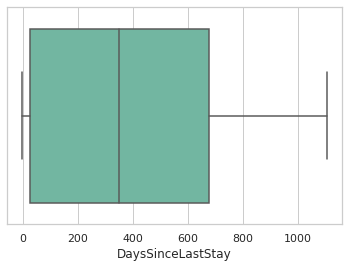

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


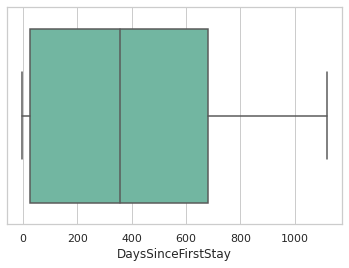

In [65]:
# checking for outliers

for i in df.select_dtypes('number').columns:
    sns.boxplot(df[i])
    plt.show()

In [66]:
# There are features with outliers

In [67]:
def iqr_capping(df,cols,factor):    
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        ll = q1-(factor*iqr)
        ul = q3+(factor*iqr)
        for ind in df[col].index:
            if df.loc[ind,col] < ll:
                df.loc[ind,col] = ll
            elif df.loc[ind,col] > ul:
                df.loc[ind,col] = ul

In [68]:
df1 = df.copy(deep=True)
cols = df1.select_dtypes('number')

In [69]:
iqr_capping(df1,cols,1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


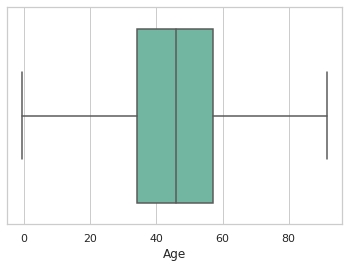

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


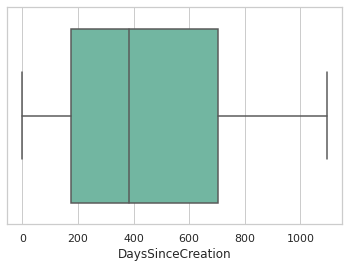

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


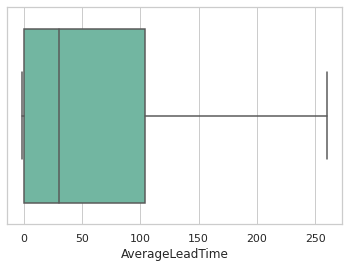

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


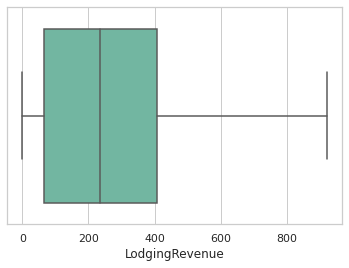

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


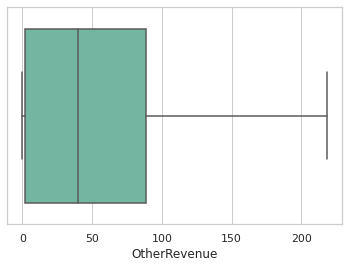

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


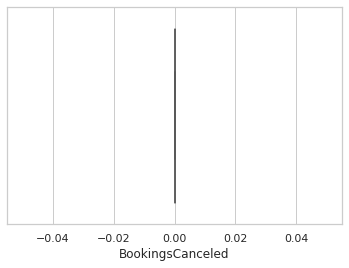

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


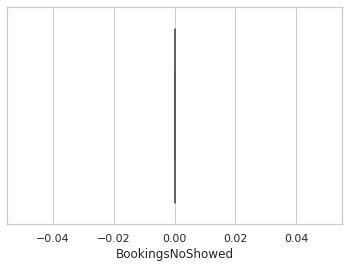

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


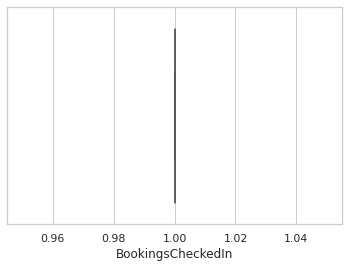

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


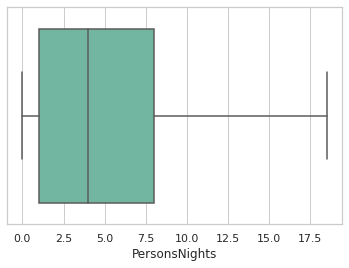

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


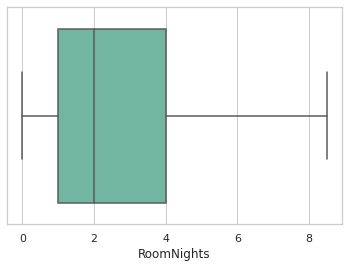

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


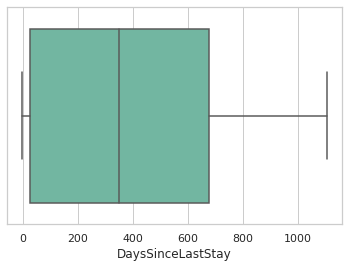

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


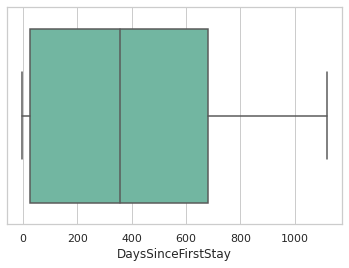

In [70]:
for i in df.select_dtypes('number').columns:
    sns.boxplot(df1[i])
    plt.show()

In [71]:
df1.nunique()

Age                       94
DaysSinceCreation       1095
AverageLeadTime          262
LodgingRevenue          8222
OtherRevenue            2585
BookingsCanceled           1
BookingsNoShowed           1
BookingsCheckedIn          1
PersonsNights             20
RoomNights                10
DaysSinceLastStay       1105
DaysSinceFirstStay      1106
DistributionChannel        4
MarketSegment              7
SRHighFloor                2
SRLowFloor                 2
SRAccessibleRoom           2
SRMediumFloor              2
SRBathtub                  2
SRShower                   2
SRCrib                     2
SRKingSizeBed              2
SRTwinBed                  2
SRNearElevator             2
SRAwayFromElevator         2
SRNoAlcoholInMiniBar       2
SRQuietRoom                2
dtype: int64

In [72]:
# As the unique values are less but still it is a numerical feature , we will replace the new features with old ones
df1.BookingsCanceled = df.BookingsCanceled
df1.BookingsNoShowed = df.BookingsNoShowed
df1.BookingsCheckedIn = df.BookingsCheckedIn


In [73]:
df.nunique()

Age                       105
DaysSinceCreation        1095
AverageLeadTime           417
LodgingRevenue          10031
OtherRevenue             4393
BookingsCanceled            6
BookingsNoShowed            4
BookingsCheckedIn          28
PersonsNights              54
RoomNights                 45
DaysSinceLastStay        1105
DaysSinceFirstStay       1106
DistributionChannel         4
MarketSegment               7
SRHighFloor                 2
SRLowFloor                  2
SRAccessibleRoom            2
SRMediumFloor               2
SRBathtub                   2
SRShower                    2
SRCrib                      2
SRKingSizeBed               2
SRTwinBed                   2
SRNearElevator              2
SRAwayFromElevator          2
SRNoAlcoholInMiniBar        2
SRQuietRoom                 2
dtype: int64

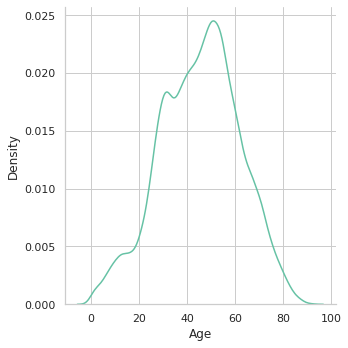

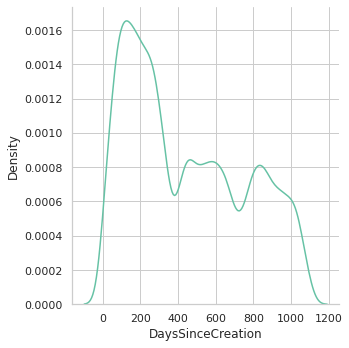

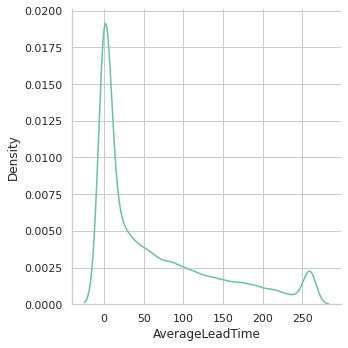

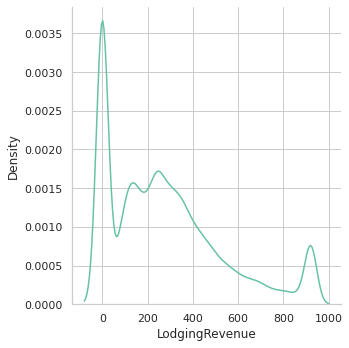

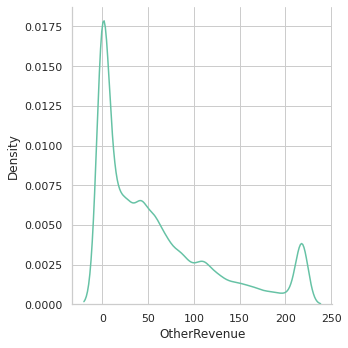

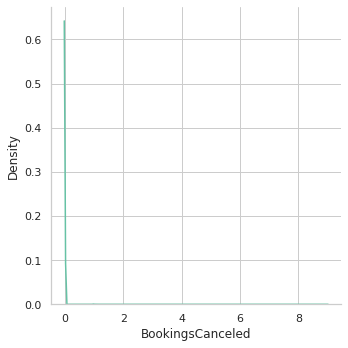

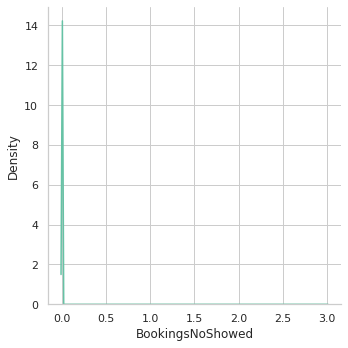

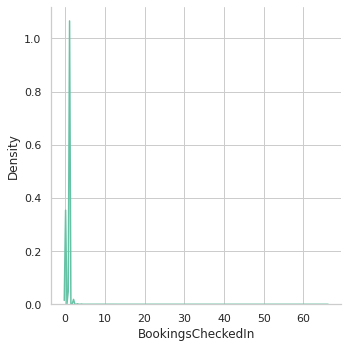

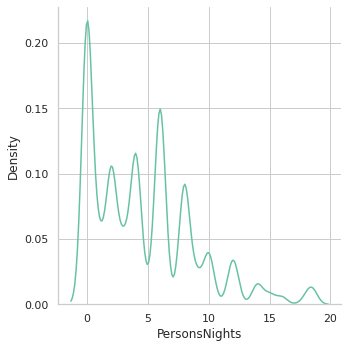

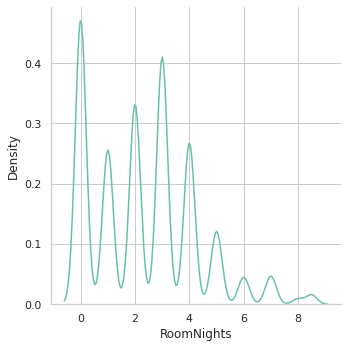

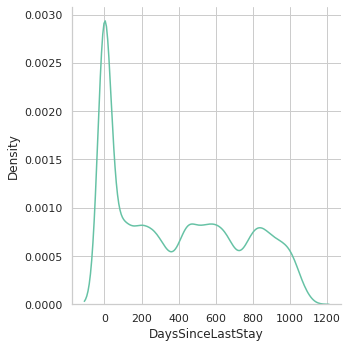

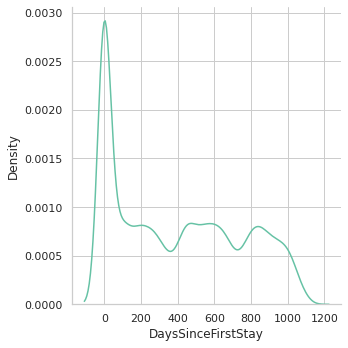

In [74]:
# Checking the distribution of numerical variable
for i in df1.select_dtypes('number'):
    sns.displot(df1[i],kind='kde')
    plt.show()

In [75]:
# skewed and multimodal distributions are present within the dataset

## Data preprocessing

In [76]:
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [77]:
# Scaling the numerical columns
df_scaled = df1.copy(deep=True)
df_scaled.iloc[:,:12] = df_scaled.iloc[:,:12].apply(stats.zscore) 

In [78]:
df_scaled.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.338333,-0.954492,-0.240162,0.371089,0.725495,15.143822,-0.020358,3.196630,0.790512,1.377434,-0.708012,1.967200,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.869389,2.087820,-0.829286,-1.085578,-0.906456,-0.027944,-0.020358,-1.148484,-1.085936,-1.214466,-1.150318,-1.154204,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.881808,2.087820,0.388237,-0.143260,0.023430,-0.027944,-0.020358,0.299888,1.259624,1.377434,2.053493,2.042694,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.338333,2.087820,-0.829286,-1.085578,-0.906456,-0.027944,-0.020358,-1.148484,-1.085936,-1.214466,-1.150318,-1.154204,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.519491,2.087820,-0.069971,-0.182523,-0.534502,-0.027944,-0.020358,0.299888,-0.147712,-0.177706,2.044763,2.033983,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
col_encode = df_scaled.iloc[:,12:14]

In [80]:
le = LabelEncoder()
for i in col_encode.columns:
  df_scaled[i] = le.fit_transform(df_scaled[i])

In [81]:
df_scaled.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.338333,-0.954492,-0.240162,0.371089,0.725495,15.143822,-0.020358,3.196630,0.790512,1.377434,-0.708012,1.967200,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.869389,2.087820,-0.829286,-1.085578,-0.906456,-0.027944,-0.020358,-1.148484,-1.085936,-1.214466,-1.150318,-1.154204,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.881808,2.087820,0.388237,-0.143260,0.023430,-0.027944,-0.020358,0.299888,1.259624,1.377434,2.053493,2.042694,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.338333,2.087820,-0.829286,-1.085578,-0.906456,-0.027944,-0.020358,-1.148484,-1.085936,-1.214466,-1.150318,-1.154204,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.519491,2.087820,-0.069971,-0.182523,-0.534502,-0.027944,-0.020358,0.299888,-0.147712,-0.177706,2.044763,2.033983,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
# converting categorical to numeric types for futher clustering and modelling
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79811 entries, 1 to 83590
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   79811 non-null  float64
 1   DaysSinceCreation     79811 non-null  float64
 2   AverageLeadTime       79811 non-null  float64
 3   LodgingRevenue        79811 non-null  float64
 4   OtherRevenue          79811 non-null  float64
 5   BookingsCanceled      79811 non-null  float64
 6   BookingsNoShowed      79811 non-null  float64
 7   BookingsCheckedIn     79811 non-null  float64
 8   PersonsNights         79811 non-null  float64
 9   RoomNights            79811 non-null  float64
 10  DaysSinceLastStay     79811 non-null  float64
 11  DaysSinceFirstStay    79811 non-null  float64
 12  DistributionChannel   79811 non-null  int64  
 13  MarketSegment         79811 non-null  int64  
 14  SRHighFloor           79811 non-null  object 
 15  SRLowFloor         

In [83]:
df_scaled.iloc[:,14:] = df_scaled.iloc[:,14:].astype('int64')

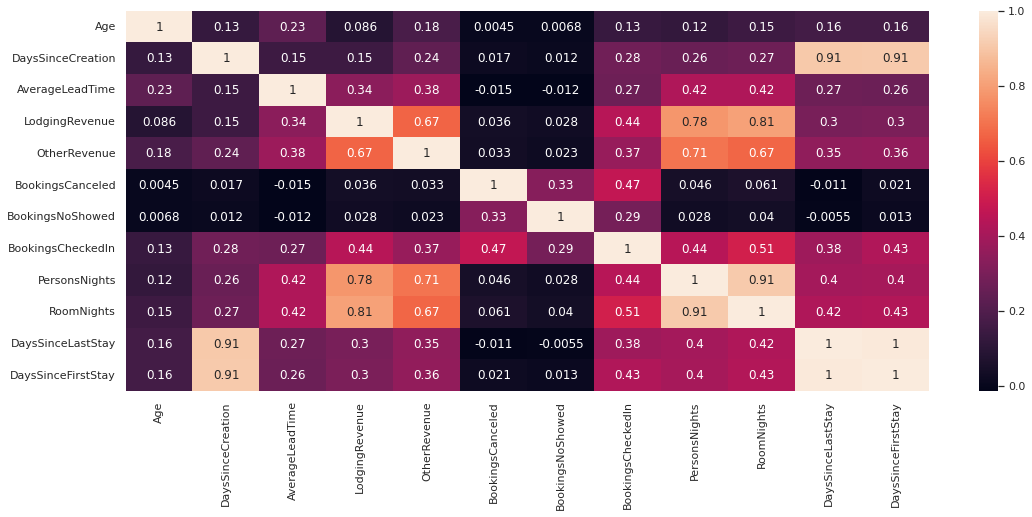

In [84]:
# Checking for correlation
plt.figure(figsize=(18,7))
sns.heatmap(df1.corr(),annot=True)

In [85]:
# Feature numbers are high and Multi-Collinearity exists , So we are moving forward with PCA

## PCA and Clustering

In [86]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [87]:
cov_matrix = np.cov(df_scaled.T)
eig_vals = np.linalg.eigvals(cov_matrix)

In [88]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 34.07102552,  48.11187044,  60.52481055,  70.28808239,
        77.44725372,  82.39453282,  87.11959415,  90.06175893,
        92.43144011,  94.18098187,  95.81030705,  97.03314346,
        97.75246502,  98.39908221,  98.95457857,  99.49373607,
        99.80913117,  99.89976955,  99.92441686,  99.9459349 ,
        99.96625847,  99.97870263,  99.98888094,  99.99499572,
        99.99753419,  99.99912149, 100.        ])

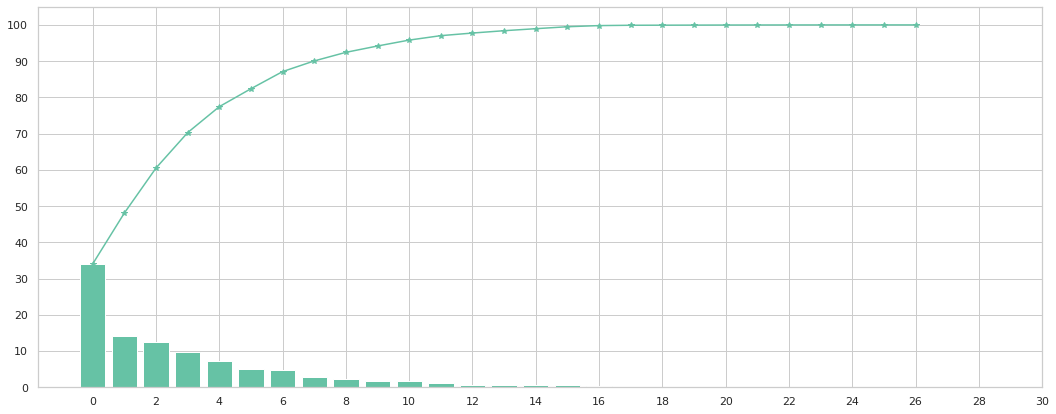

In [89]:
plt.figure(figsize=(18,7))
plt.plot(range(27),cum_var_exp,marker='*')
plt.bar(range(27),var_exp)
plt.xticks(ticks = range(0,31,2))
plt.yticks(ticks = range(0,101,10))
plt.show()

In [90]:
# We need 95% of explained variance and around 10 features explains 95% of variance

In [91]:
pca = PCA(n_components=10)
pca1 = pca.fit_transform(df_scaled)
pca1

array([[ 2.92323684,  3.46047675, 10.03017851, ..., -4.26902989,
        -3.90303966,  0.22569079],
       [-2.31644789, -1.57811339, -0.72507002, ..., -0.66815176,
        -0.38176153,  0.50586275],
       [ 3.33396608, -2.29784833, -0.71831332, ...,  0.31136083,
        -0.90167403,  0.43056881],
       ...,
       [-3.21125054,  0.27977105, -0.56282615, ..., -0.10316767,
        -0.09689248, -0.60168524],
       [ 0.16725609,  2.52031029, -0.90792892, ...,  1.43540398,
        -0.67563823,  0.73866069],
       [-3.48937663,  0.34364151, -0.42046426, ..., -0.32025593,
         0.06680716,  0.5971431 ]])

In [92]:
pca_df = pd.DataFrame(data = pca1 , columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [93]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.923237,3.460477,10.030179,5.247114,0.356933,8.390470,1.618644,-4.269030,-3.903040,0.225691
1,-2.316448,-1.578113,-0.725070,0.933630,-0.893606,-0.138565,0.123063,-0.668152,-0.381762,0.505863
2,3.333966,-2.297848,-0.718313,0.611513,0.148718,-0.120406,0.351427,0.311361,-0.901674,0.430569
3,-2.178586,-1.613350,-0.786901,0.983736,0.175243,-0.225297,0.635443,-0.582658,-0.476948,0.518749
4,1.805635,-3.158955,0.244003,0.339430,0.111656,-0.007660,0.166443,0.302268,-0.258150,0.248435


In [94]:
cluster_range = range(1,10)
cluster_errors = []

for i in cluster_range:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pca_df)
  cluster_errors.append(kmeans.inertia_)


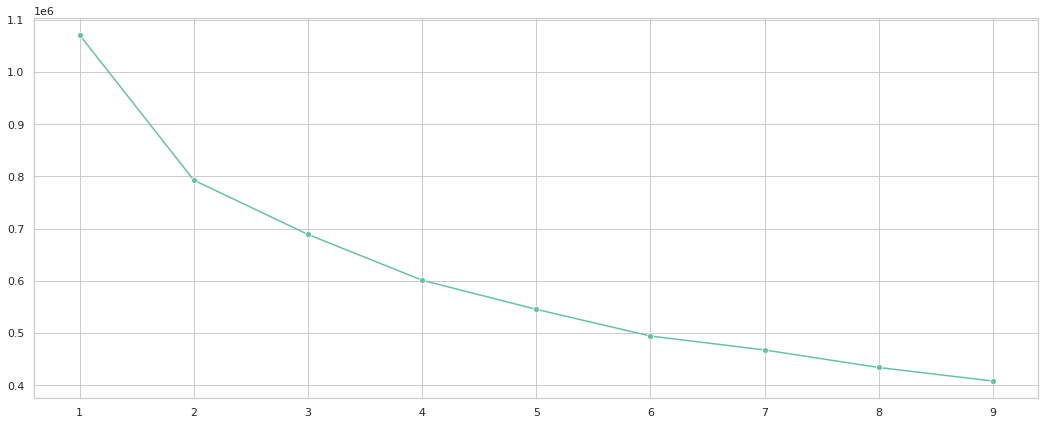

In [95]:
plt.figure(figsize=(18,7))
sns.lineplot(x = cluster_range,y = cluster_errors,marker = 'o')
plt.show()

In [96]:
# taking n_clusters as 3

In [97]:
kmeans = KMeans(n_clusters=3,n_jobs=-1,random_state=7)
clusters = kmeans.fit_predict(pca_df)

In [98]:
df_scaled['Labels'] = clusters
df1['Labels'] = clusters
pca_df['Labels'] = clusters

In [99]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Labels
0,2.923237,3.460477,10.030179,5.247114,0.356933,8.390470,1.618644,-4.269030,-3.903040,0.225691,0
1,-2.316448,-1.578113,-0.725070,0.933630,-0.893606,-0.138565,0.123063,-0.668152,-0.381762,0.505863,1
2,3.333966,-2.297848,-0.718313,0.611513,0.148718,-0.120406,0.351427,0.311361,-0.901674,0.430569,2
3,-2.178586,-1.613350,-0.786901,0.983736,0.175243,-0.225297,0.635443,-0.582658,-0.476948,0.518749,1
4,1.805635,-3.158955,0.244003,0.339430,0.111656,-0.007660,0.166443,0.302268,-0.258150,0.248435,2


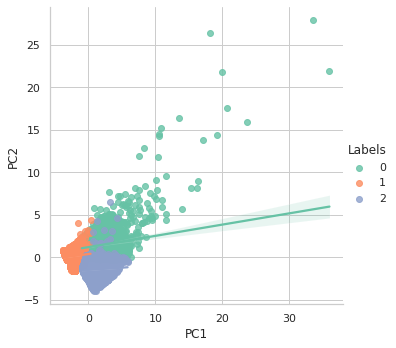

In [100]:
sns.lmplot(data=pca_df,x='PC1',y = 'PC2',hue='Labels')
plt.show()

## Finding meaning out of clusters

In [101]:
df1.groupby('Labels')['LodgingRevenue'].mean().sort_values(ascending=False)

Labels
0    520.556791
2    269.074572
1     52.778648
Name: LodgingRevenue, dtype: float64

In [102]:
# From the labels We can clearly differentiate the customers based on the lodging revenue the hotel gets
# Label 2 - High income class customer
# Label 0 - Medium income class customer
# Label 1 - Low income class customer

In [103]:
# As we already added the labels to the scaled variant of the above dataset we can proceed

In [104]:
# Now that we know the Meaning of the label we can rename the target
df_scaled.rename({'Labels':'Customer_Type'},axis=1,inplace=True)

## Making models using labels extracted from pca dataset


In [105]:
# For explainabiltiy we are going forward with df1 with labels extract from the pca dataset

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier,VotingClassifier
from sklearn.inspection import plot_partial_dependence
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,KFold

## Train test split

In [107]:
x = df_scaled.drop(columns=['Customer_Type'])
y = df_scaled['Customer_Type']

In [108]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.8 , random_state = 7)

## Base Model (KNN)

* Fitting

In [109]:
knn = KNeighborsClassifier()
model_knn = knn.fit(xtrain,ytrain)
ypred = model_knn.predict(xtest)

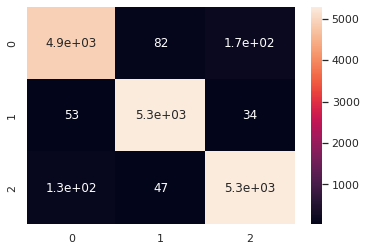

In [110]:
cm = metrics.confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [111]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      5148
           1       0.98      0.98      0.98      5373
           2       0.96      0.97      0.97      5442

    accuracy                           0.97     15963
   macro avg       0.97      0.97      0.97     15963
weighted avg       0.97      0.97      0.97     15963



* Cross validation

In [112]:
k = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(knn,x,y,scoring='f1_weighted',cv=k,n_jobs=-1)
score_knn = np.mean(scores)
bias_error_knn = 1-score_knn
variance_error_knn = np.std(scores)/np.mean(scores)
print('F1-weighted score = ',score_knn)
print('Bias error = ',bias_error_knn)
print('Variance error = ',variance_error_knn)


F1-weighted score =  0.9700871267003283
Bias error =  0.02991287329967174
Variance error =  0.0018182692741957785


## Model 2 : Decision Tree 

* Fitting

In [113]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(xtrain,ytrain)
ypred = model_dt.predict(xtest)

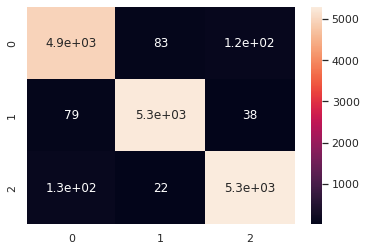

In [114]:
cm = metrics.confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [115]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5148
           1       0.98      0.98      0.98      5373
           2       0.97      0.97      0.97      5442

    accuracy                           0.97     15963
   macro avg       0.97      0.97      0.97     15963
weighted avg       0.97      0.97      0.97     15963



* Cross validation

In [116]:
k = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(dt,x,y,scoring='f1_weighted',cv=k,n_jobs=-1)
score_dt = np.mean(scores)
bias_error_dt = 1-score_dt
variance_error_dt = np.std(scores)/np.mean(scores)
print('F1-weighted score = ',score_dt)
print('Bias error = ',bias_error_dt)
print('Variance error = ',variance_error_dt)


F1-weighted score =  0.9733998414562031
Bias error =  0.026600158543796937
Variance error =  0.0018675198488279992


## Model 3 : Random forest

* Fitting

In [117]:
rf = RandomForestClassifier()
model_rf = rf.fit(xtrain,ytrain)
ypred = model_rf.predict(xtest)

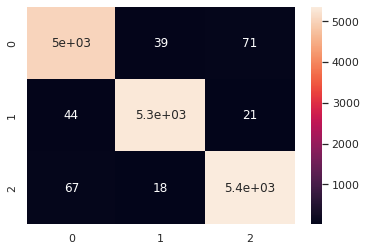

In [118]:
cm = metrics.confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [119]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5148
           1       0.99      0.99      0.99      5373
           2       0.98      0.98      0.98      5442

    accuracy                           0.98     15963
   macro avg       0.98      0.98      0.98     15963
weighted avg       0.98      0.98      0.98     15963



* Cross Validation

In [120]:
k = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(rf,x,y,scoring='f1_weighted',cv=k,n_jobs=-1)
score_rf = np.mean(scores)
bias_error_rf = 1-score_rf
variance_error_rf = np.std(scores)/np.mean(scores)
print('F1-weighted score = ',score_rf)
print('Bias error = ',bias_error_rf)
print('Variance error = ',variance_error_rf)


F1-weighted score =  0.9852051067442072
Bias error =  0.014794893255792751
Variance error =  0.0011165414005404359


## Model 4 : Adaptive Boosting

* Fitting

In [121]:
ada = AdaBoostClassifier()
model_ada = ada.fit(xtrain,ytrain)
ypred = model_ada.predict(xtest)

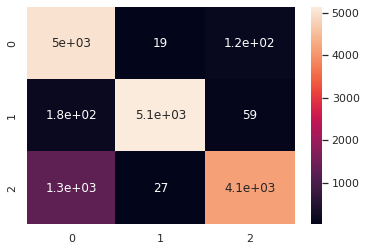

In [122]:
cm = metrics.confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [123]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      5148
           1       0.99      0.96      0.97      5373
           2       0.96      0.76      0.85      5442

    accuracy                           0.89     15963
   macro avg       0.91      0.90      0.89     15963
weighted avg       0.91      0.89      0.89     15963



* Cross Validation

In [124]:
k = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(ada,x,y,scoring='f1_weighted',cv=k,n_jobs=-1)
score_ada = np.mean(scores)
bias_error_ada = 1-score_ada
variance_error_ada = np.std(scores)/np.mean(scores)
print('F1-weighted score = ',score_ada)
print('Bias error = ',bias_error_ada)
print('Variance error = ',variance_error_ada)


F1-weighted score =  0.89597338831168
Bias error =  0.10402661168831995
Variance error =  0.01435666341794861


## Model 5 : Gradient Boosting

* Fitting

In [125]:
gb = GradientBoostingClassifier()
model_gb = gb.fit(xtrain,ytrain)
ypred = model_gb.predict(xtest)

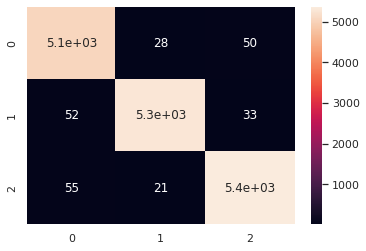

In [126]:
cm = metrics.confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [127]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5148
           1       0.99      0.98      0.99      5373
           2       0.98      0.99      0.99      5442

    accuracy                           0.99     15963
   macro avg       0.98      0.99      0.98     15963
weighted avg       0.99      0.99      0.99     15963



* Cross validation

In [128]:
k = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(gb,x,y,scoring='f1_weighted',cv=k,n_jobs=-1)
score_gb = np.mean(scores)
bias_error_gb = 1-score_gb
variance_error_gb = np.std(scores)/np.mean(scores)
print('F1-weighted score = ',score_gb)
print('Bias error = ',bias_error_gb)
print('Variance error = ',variance_error_gb)


F1-weighted score =  0.9855087131804151
Bias error =  0.014491286819584892
Variance error =  0.0009491225968172699


## Model 6 : Xtreme Gradient Boosting

* Fitting

In [129]:
xgb = XGBClassifier()
model_xgb = xgb.fit(xtrain,ytrain)
ypred = model_xgb.predict(xtest)

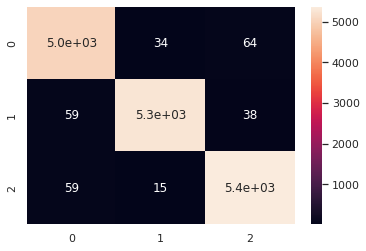

In [130]:
cm = metrics.confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [131]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5148
           1       0.99      0.98      0.99      5373
           2       0.98      0.99      0.98      5442

    accuracy                           0.98     15963
   macro avg       0.98      0.98      0.98     15963
weighted avg       0.98      0.98      0.98     15963



* Cross Validation

In [132]:
k = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(xgb,x,y,scoring='f1_weighted',cv=k,n_jobs=-1)
score_xgb = np.mean(scores)
bias_error_xgb = 1-score_xgb
variance_error_xgb = np.std(scores)/np.mean(scores)
print('F1-weighted score = ',score_xgb)
print('Bias error = ',bias_error_xgb)
print('Variance error = ',variance_error_xgb)


F1-weighted score =  0.9827160841302366
Bias error =  0.01728391586976341
Variance error =  0.0009089914271038169


## Primary Inference

In [133]:
results_df = pd.DataFrame({'Models':['KNN','DecisionTree','RandomForest','AdaBoosting','GradientBoosting','XGB'],
                           'F1-Weighted':[score_knn,score_dt,score_rf,score_ada,score_gb,score_xgb],
                           'Bias Error':[bias_error_knn,bias_error_dt,bias_error_rf,bias_error_ada,bias_error_gb,bias_error_xgb],
                           'Variance Error':[variance_error_knn,variance_error_dt,variance_error_rf,
                                             variance_error_ada,variance_error_gb,variance_error_xgb]})
results_df.sort_values(by='F1-Weighted',ascending=False)

,Models,F1-Weighted,Bias Error,Variance Error
4,GradientBoosting,0.985509,0.014491,0.000949
2,RandomForest,0.985205,0.014795,0.001117
5,XGB,0.982716,0.017284,0.000909
1,DecisionTree,0.973400,0.026600,0.001868
0,KNN,0.970087,0.029913,0.001818
3,AdaBoosting,0.895973,0.104027,0.014357


In [134]:
# Considering all factors Grdient Boosting is the best model , Hence we are taking Random Forest for improving the 
# score through hyperparameter Tuning

# Model 7 : Gradient boosting with Hyper-parameter tuning (Randomized search Cv)

* Fitting

In [137]:
gb_tune = GradientBoostingClassifier()
params = {'n_estimators':np.arange(100,250,35),
          'loss' : ['deviance', 'exponential'],
          'max_depth':np.arange(1,25)}
rand = RandomizedSearchCV(estimator=gb_tune,param_distributions=params,scoring='f1_weighted',cv=k,random_state=7,n_jobs = -1)
rand.fit(xtrain,ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
                   error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samp

In [138]:
rand.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=11,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [145]:
gb_tuned = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=11,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
model_gb_tuned = gb_tuned.fit(xtrain,ytrain)
ypred = model_gb_tuned.predict(xtest)

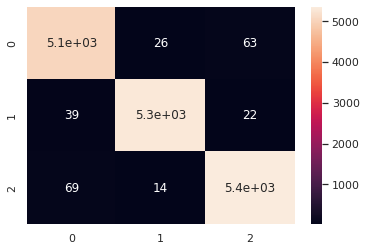

In [146]:
cm = metrics.confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [147]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5148
           1       0.99      0.99      0.99      5373
           2       0.98      0.98      0.98      5442

    accuracy                           0.99     15963
   macro avg       0.99      0.99      0.99     15963
weighted avg       0.99      0.99      0.99     15963



* Cross Validation

In [149]:
k = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(gb_tuned,x,y,scoring='f1_weighted',cv=k,n_jobs=-1)
score_gb_tuned = np.mean(scores)
bias_error_gb_tuned = 1-score_gb_tuned
variance_error_gb_tuned = np.std(scores)/np.mean(scores)
print('F1-weighted score = ',score_gb_tuned)
print('Bias error = ',bias_error_gb_tuned)
print('Variance error = ',variance_error_gb_tuned)


F1-weighted score =  0.9865837521961505
Bias error =  0.013416247803849535
Variance error =  0.0008719036209401771


In [150]:
# We can see an improvement in all parameters (F1-weighted,Bias Error,Variance Error), 
# Hence we are considering this as the final model

## Model 8 : Stacking Classifier

* Fitting

In [151]:
est = [('GB',gb),('XGB',xgb),('RF',rf)]
gb_tuned = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=11,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
stack = StackingClassifier(estimators=est,final_estimator=gb_tuned,cv=k,n_jobs=-1)
model_stack = stack.fit(xtrain,ytrain)
ypred = model_stack.predict(xtest)

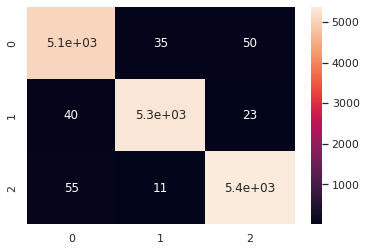

In [152]:
cm = metrics.confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [153]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5148
           1       0.99      0.99      0.99      5373
           2       0.99      0.99      0.99      5442

    accuracy                           0.99     15963
   macro avg       0.99      0.99      0.99     15963
weighted avg       0.99      0.99      0.99     15963



* Cross Validation

In [154]:
k = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(stack,x,y,scoring='f1_weighted',cv=k,n_jobs=-1)
score_stack = np.mean(scores)
bias_error_stack = 1-score_stack
variance_error_stack = np.std(scores)/np.mean(scores)


In [155]:
print('F1-weighted score = ',score_stack)
print('Bias error = ',bias_error_stack)
print('Variance error = ',variance_error_stack)


F1-weighted score =  0.9868946601318085
Bias error =  0.013105339868191512
Variance error =  0.0006703959718291102


## Voting Classifier

* Fitting

In [156]:
est = [('GB',gb),('Rf_tuned',gb_tuned),('XGB',xgb),('RF',rf)]
vote = VotingClassifier(estimators=est)
model_vote = vote.fit(xtrain,ytrain)
ypred = model_vote.predict(xtest)

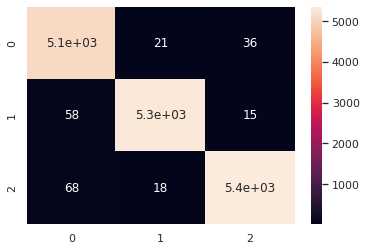

In [157]:
cm = metrics.confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [158]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5148
           1       0.99      0.99      0.99      5373
           2       0.99      0.98      0.99      5442

    accuracy                           0.99     15963
   macro avg       0.99      0.99      0.99     15963
weighted avg       0.99      0.99      0.99     15963



* Cross Validation

In [159]:
k = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(vote,x,y,scoring='f1_weighted',cv=k,n_jobs=-1)
score_vote = np.mean(scores)
bias_error_vote = 1-score_vote
variance_error_vote = np.std(scores)/np.mean(scores)
print('F1-weighted score = ',score_vote)
print('Bias error = ',bias_error_vote)
print('Variance error = ',variance_error_vote)


F1-weighted score =  0.9865441643348761
Bias error =  0.013455835665123872
Variance error =  0.0011398605619425803


## Final Result

In [160]:
results_df = pd.DataFrame({'Models':['KNN','DecisionTree','RandomForest','AdaBoosting','GradientBoosting','XGB',
                                     'Tuned_RF','Stacking Classifier','Voting Classifier'],
                           'F1-Weighted':[score_knn,score_dt,score_rf,score_ada,score_gb,score_xgb,score_rf_tuned,
                                          score_stack,score_vote],
                           'Bias Error':[bias_error_knn,bias_error_dt,bias_error_rf,bias_error_ada,bias_error_gb,
                                         bias_error_xgb,bias_error_rf_tuned,bias_error_stack,bias_error_vote],
                           'Variance Error':[variance_error_knn,variance_error_dt,variance_error_rf,
                                             variance_error_ada,variance_error_gb,variance_error_xgb,
                                             variance_error_rf_tuned,variance_error_stack,variance_error_vote]})
results_df.sort_values(by='F1-Weighted',ascending=False)

,Models,F1-Weighted,Bias Error,Variance Error
7,Stacking Classifier,0.986895,0.013105,0.000670
8,Voting Classifier,0.986544,0.013456,0.001140
6,Tuned_RF,0.985555,0.014445,0.000889
4,GradientBoosting,0.985509,0.014491,0.000949
2,RandomForest,0.985205,0.014795,0.001117
5,XGB,0.982716,0.017284,0.000909
1,DecisionTree,0.973400,0.026600,0.001868
0,KNN,0.970087,0.029913,0.001818
3,AdaBoosting,0.895973,0.104027,0.014357


In [161]:
# Stacking model is the best in all fronts , 
# hence we are considering stacking model as the final model for futher interpretation

## Business Interpretation

* The final model we considered which is stacking model is stable and highly accurate in terms of prediction 
* Hence the client can use this model for future use and plan strategies according to that

## Limitations

* We chose lodging revenue for the uderstandability of the target.Eventhough this feature contributes most towards the customer type, it isn't necessary that it is the only feature which can be used for this purpose. So, we can say that the full meaning of the target variable is still unknown

* Eventhough, the bias and variance error is low, it is still present. So, the model is still not a perfectly accurate one

## Conclusion

* We can say we successfully completed the problem with very few limitations and we were able to predict with high precision and recall based on the labels we created based on the clustering 